<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

Отобразите 10 случайных строк тренировочного датасета (0.15 балла)

In [ ]:
df_train.sample(n = 10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)

In [ ]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [ ]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения


In [ ]:
missing_counts_train = df_train.isna().sum()

columns_with_missing_train = missing_counts_train[missing_counts_train > 0]
columns_with_missing_train

,0
mileage,202
engine,202
max_power,196
torque,203
seats,202


In [ ]:
missing_counts_test = df_test.isna().sum()
columns_with_missing_test = missing_counts_test[missing_counts_test > 0]
columns_with_missing_test

,0
mileage,19
engine,19
max_power,19
torque,19
seats,19


Посмотрите, есть ли в данных явные дубликаты (0.05 балла)

In [ ]:
print('Количество строк тренировочного датасета: ', df_train.shape[0])
print('Количество строк тестового датасета', df_test.shape[0])


Количество строк тренировочного датасета:  6999
Количество строк тестового датасета 1000


In [ ]:
df_train[df_train.duplicated()].shape[0]

985

In [ ]:
df_test[df_test.duplicated()].shape[0]

62

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [ ]:
def make_numeric(value):
    value = str(value)
    value = value.split(' ')[0]
    if value == '':  # Проверяем, является ли строка пустой
        return 0
    return float(value)

In [ ]:
df_train['engine'] = df_train['engine'].apply(make_numeric)
df_train['mileage'] = df_train['mileage'].apply(make_numeric)
df_train['max_power'] = df_train['max_power'].apply(make_numeric)

In [ ]:
df_test['engine'] = df_test['engine'].apply(make_numeric)
df_test['mileage'] = df_test['mileage'].apply(make_numeric)
df_test['max_power'] = df_test['max_power'].apply(make_numeric)

In [ ]:
engine_median = df_train['engine'].median()
mileage_median = df_train['mileage'].median()
max_power_median = df_train['max_power'].median()
seats_median = df_train['seats'].median()

In [ ]:
df_train['engine'] = df_train['engine'].fillna(engine_median)
df_train['mileage'] = df_train['mileage'].fillna(mileage_median)
df_train['max_power'] = df_train['max_power'].fillna(max_power_median)
df_train['seats'] = df_train['seats'].fillna(seats_median)

In [ ]:
df_test['engine'] = df_test['engine'].fillna(engine_median)
df_test['mileage'] = df_test['mileage'].fillna(mileage_median)
df_test['max_power'] = df_test['max_power'].fillna(max_power_median)
df_test['seats'] = df_test['seats'].fillna(seats_median)

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:

df_train_without_target = df_train.drop(columns=['selling_price'])

# Находим дубликаты по признаковым данным
duplicates = df_train_without_target[df_train_without_target.duplicated()]

# Подсчитываем количество дубликатов
num_duplicates = len(duplicates)
print(f"Количество дублированных объектов (за исключением целевой переменной): {num_duplicates}")


Количество дублированных объектов (за исключением целевой переменной): 1159


In [ ]:
#Удаляем повторяющееся строки, оставляем первую строку по автомобилю
df_train = df_train.drop_duplicates(subset=df_train_without_target.columns, keep='first')
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [ ]:
#Обновляем индексы
df_train = df_train.reset_index(drop = True)
df_train.shape

(5840, 13)

In [ ]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
df_train = df_train.drop(columns = 'torque')


In [ ]:
df_test = df_test.drop(columns = 'torque')

In [ ]:
df_train.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,float64


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
df_train.describe(include = ['number'])

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.896741,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.660396,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [ ]:
df_train.describe(include = ['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [ ]:
df_test.describe(include = ['number'])

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [ ]:
df_test.describe(include = ['object'])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [ ]:
assert df_train.shape == (5840, 12) # исправил на 12 по скольку удалил колонку torque

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

Ответы на вопросы:
- Можно ли предположить на основе распределений связь признаков с целевой переменной? Да, можно. Например это можно увидеть из связи year c selling_price, то есть чем новее машина, тем цена ее выше. Из связи engine и selling_price, чем выше цена, тем выше возможно качество двигателя.
- Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков? Да, можно. Ответ подходит из предыдущего вопроса.

- Похожими ли оказались совокупности при разделении на трейн и тест? Да, похожи. Распределения похожи, отличается незначительно масштаб данных.

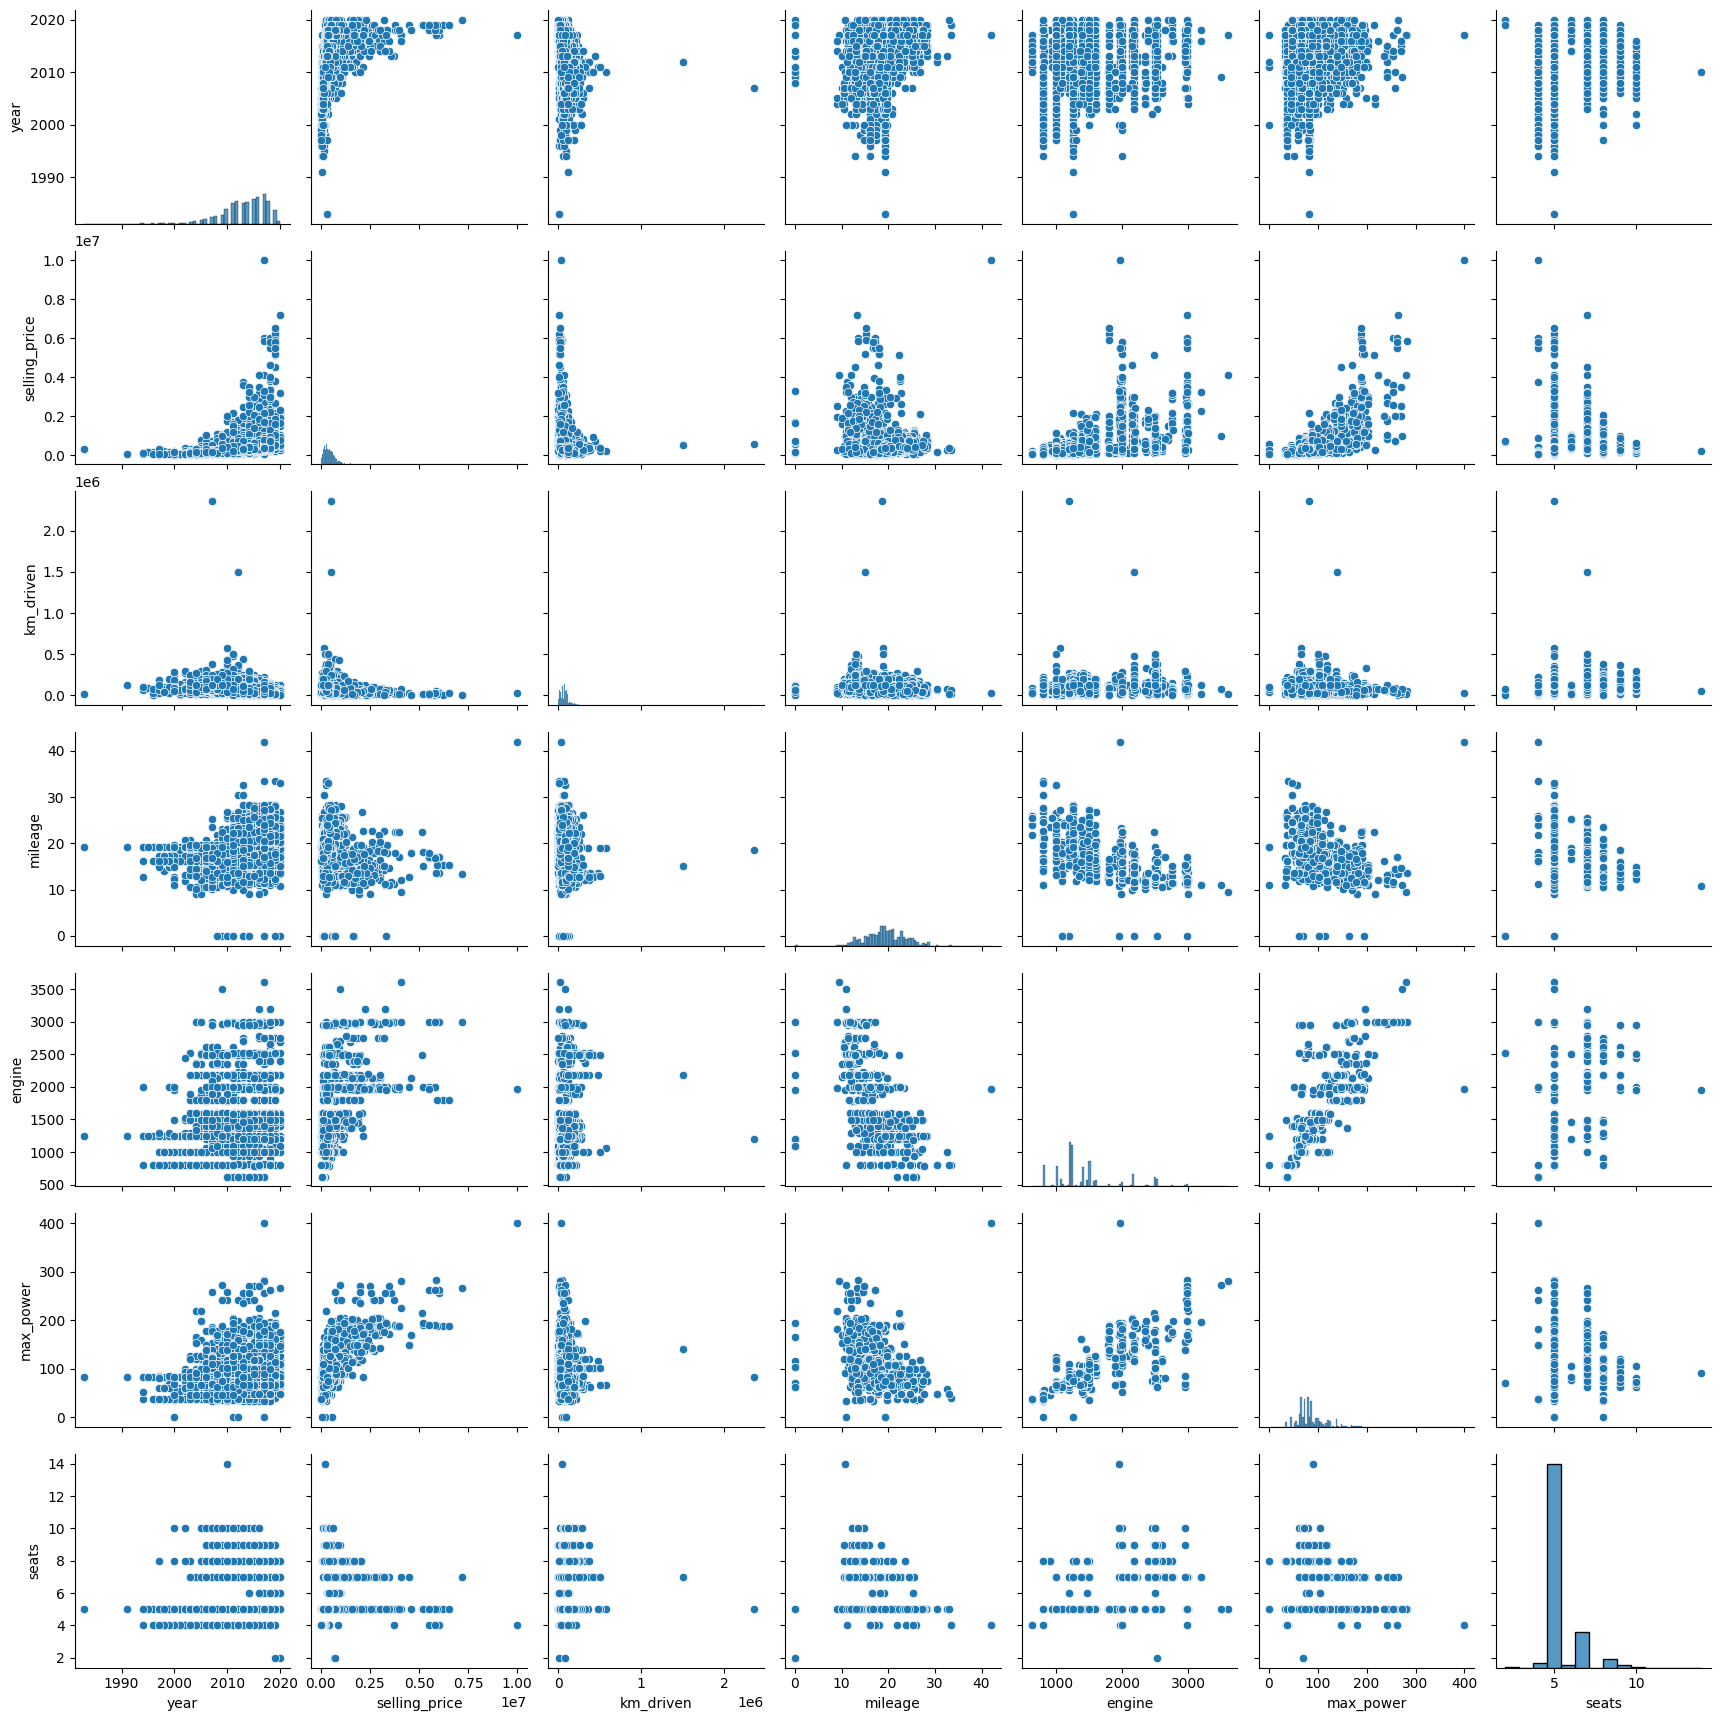

In [ ]:
sns.pairplot(df_train)
plt.show()

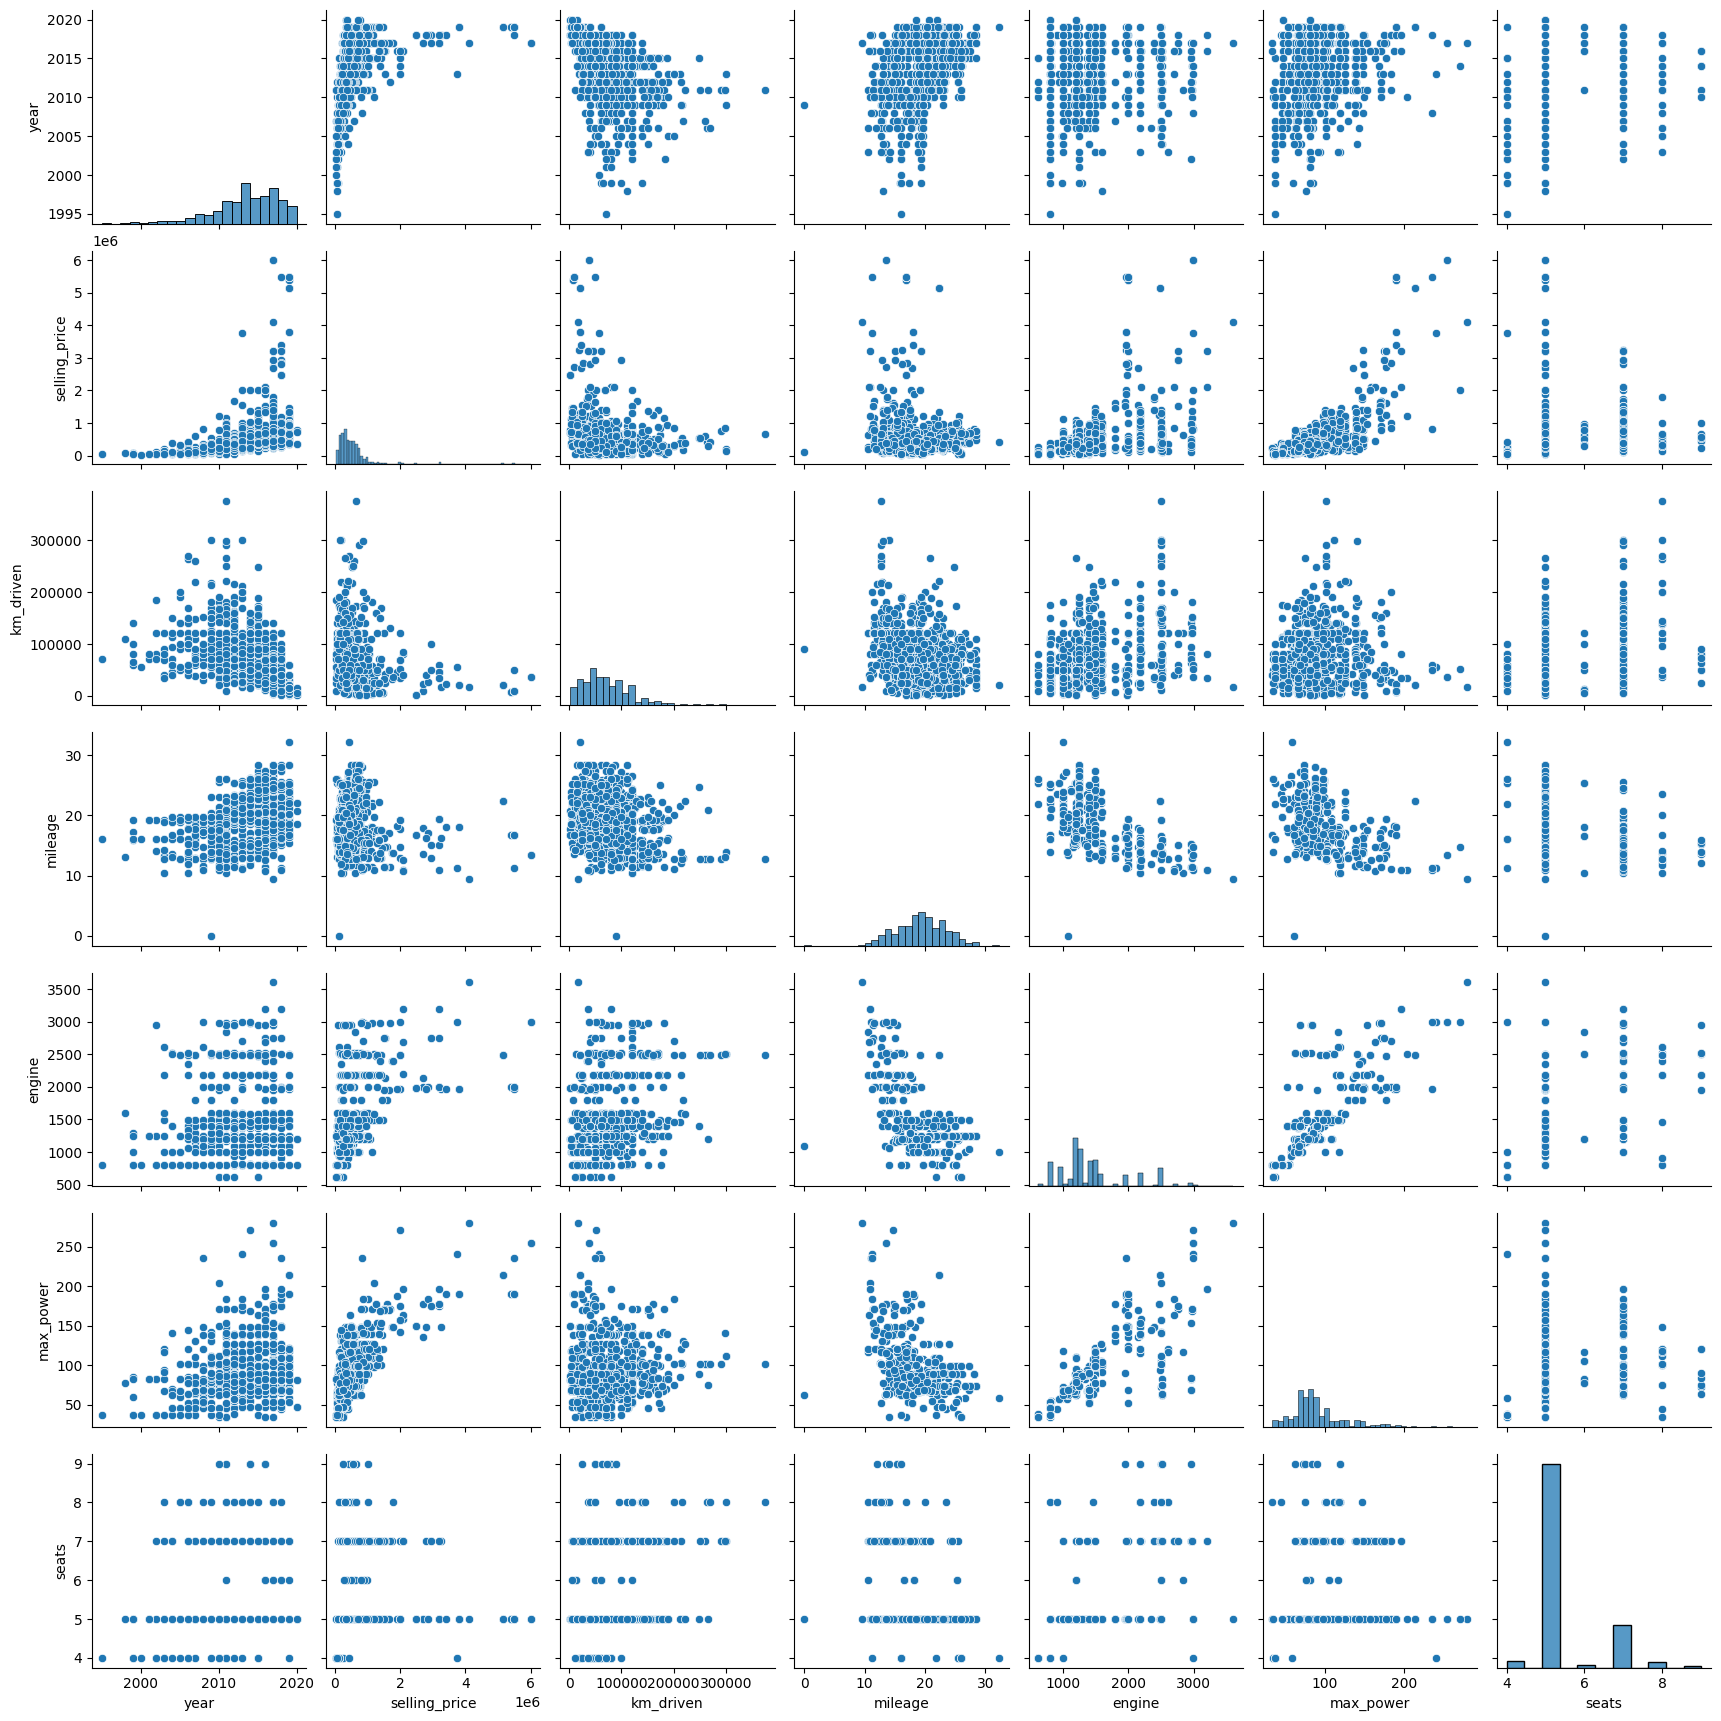

In [ ]:
sns.pairplot(df_test)

`Your answer here`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


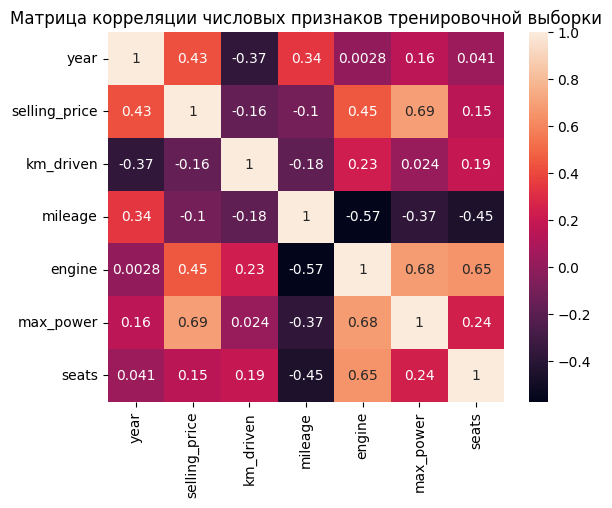

In [ ]:
df_train_corr = df_train.select_dtypes(include = ['number']).corr()
sns.heatmap(data = df_train_corr, annot = True)
plt.title('Матрица корреляции числовых признаков тренировочной выборки')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Ответы на вопросы:
- Между признаками year и engine близки к 0.0028, что указывает на практически отсутствие линейной зависимости между этими признаками.
- Между признаками selling price (target) и max_power. Коэф. корр составляет - 0.69.
- Да, можно так утверждаmь, так как между признаками отрицательная корреляция и довольно высокая.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [ ]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
df_train_copy = df_train.select_dtypes(include = ['number'])
df_test_copy = df_test.select_dtypes(include = ['number'])

In [ ]:
y_train = df_train_copy['selling_price']
X_train = df_train_copy.drop(columns = ['selling_price'])

In [ ]:
assert X_train.shape == (5840, 6)

In [ ]:
y_test = df_test_copy['selling_price']
X_test = df_test_copy.drop(columns = ['selling_price'])

In [ ]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
model_1 = LinearRegression()

model_1.fit(X_train, y_train)

test_pred_1 = model_1.predict(X_test)
train_pred_1 = model_1.predict(X_train)

print(f'''Metrics_train:
mse={MSE(y_train, train_pred_1)}
R2={r2_score(y_train, train_pred_1)}
''')

print(f'''Metrics_test:
mse={MSE(y_test, test_pred_1)}
R2={r2_score(y_test, test_pred_1)}
''')

Metrics_train:
mse=117089411804.90407
R2=0.591508196441223

Metrics_test:
mse=233550462870.9787
R2=0.5937041391209569



### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model_2 = LinearRegression()
model_2.fit(X_train_scaled, y_train)

train_pred_2 = model_2.predict(X_train_scaled)
test_pred_2 = model_2.predict(X_test_scaled)


print(f'''Metrics_test(простая лин регрессия):
mse={MSE(y_test, test_pred_1)}
R2={r2_score(y_test, test_pred_1)}
''')


print(f'''Metrics_train(после применения standard scaler):
mse={MSE(y_train, train_pred_2)}
R2={r2_score(y_train, train_pred_2)}
''')

print(f'''Metrics_test(после применения standard scaler):
mse={MSE(y_test, test_pred_2)}
R2={r2_score(y_test, test_pred_2)}
''')


Metrics_test(простая лин регрессия):
mse=233550462870.9787
R2=0.5937041391209569

Metrics_train(после применения standard scaler):
mse=117089411804.90416
R2=0.5915081964412227

Metrics_test(после применения standard scaler):
mse=233550462870.97363
R2=0.5937041391209656



Ответ: по сравнению с прошлой моделью прогноз на тестовой выборке улучшился, но незначительно.

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
print('Коэффициенты модели', model_2.coef_)

Коэффициенты модели [152483.65329864 -44289.07132357  28431.23777208  60668.51470981
 322550.41854827 -22522.33717968]


In [ ]:
coefficients = pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': model_2.coef_
})
coefficients

,Признак,Коэффициент
0,year,152483.653299
1,km_driven,-44289.071324
2,mileage,28431.237772
3,engine,60668.514710
4,max_power,322550.418548
5,seats,-22522.337180


Наиболее информативным оказался признак - max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

model_3 = Lasso()
model_3.fit(X_train_scaled, y_train)

train_pred_3 = model_3.predict(X_train_scaled)
test_pred_3 = model_3.predict(X_test_scaled)


print(f'''Metrics_test(после применения standard scaler):
mse={MSE(y_test, test_pred_2)}
R2={r2_score(y_test, test_pred_2)}
''')

print(f'''Metrics_train(standard scaler + lasso):
mse={MSE(y_train, train_pred_3)}
R2={r2_score(y_train, train_pred_3)}
''')

print(f'''Metrics_test(standard scaler + lasso):
mse={MSE(y_test, test_pred_3)}
R2={r2_score(y_test, test_pred_3)}
''')


Metrics_test(после применения standard scaler):
mse=233550462870.97363
R2=0.5937041391209656

Metrics_train(standard scaler + lasso):
mse=117089411815.03348
R2=0.5915081964058844

Metrics_test(standard scaler + lasso):
mse=233551136684.2553
R2=0.5937029669222726



Предсказание на тестовой выборке ухудшилась после реализации lasso

In [ ]:
print('Коэффициенты модели', model_3.coef_)

Коэффициенты модели [152483.46905288 -44287.94180824  28429.35743628  60663.66397512
 322551.32102849 -22519.4500556 ]


In [ ]:
coefficients_l1 = pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': model_3.coef_
})
coefficients_l1

,Признак,Коэффициент
0,year,152483.469053
1,km_driven,-44287.941808
2,mileage,28429.357436
3,engine,60663.663975
4,max_power,322551.321028
5,seats,-22519.450056


Ответ:
- L1 - регулиризация не занулила ни какие веса

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV
alpha_grid_1 = [0.001, 0.01, 0.5, 1, 10, 100, 1000, 10000, 20000, 50000, 100000]

params_1 = {'alpha' : alpha_grid_1}

model_4 = Lasso()

gs = GridSearchCV(model_4, params_1, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1, 10, 100, 1000, 10000,
                                   20000, 50000, 100000]},
             scoring='neg_mean_squared_error')

In [ ]:
best_alpha = gs.best_params_['alpha']
best_model = gs.best_estimator_
coefficients = best_model.coef_
zero_coefficients = (coefficients == 0).sum()

In [ ]:
print('Лучшая альфа', best_alpha)
print('Лучшая модель',best_model)
print('Коэф лучшей модели', coefficients)
print('Есть ли зануления у лучшей модели', zero_coefficients)



Лучшая альфа 1000
Лучшая модель Lasso(alpha=1000)
Коэф лучшей модели [152263.85228299 -43182.29284049  26611.14602403  55911.84185136
 323426.41645725 -19657.13369788]
Есть ли зануления у лучшей модели 0


Ответ:
- Модель обучалась 4 секунды
- Лучший коэф регулиризации (alpha) 1000

- Признаки не занулились

In [ ]:
train_pred_4 = gs.best_estimator_.predict(X_train_scaled)
test_pred_4  = gs.best_estimator_.predict(X_test_scaled)


print(f'''Metrics_test(standard scaler + lasso):
mse={MSE(y_test, test_pred_3)}
R2={r2_score(y_test, test_pred_3)}
''')
print(f'''Metrics_train(lasso + gridsearch):
mse={MSE(y_train, train_pred_4)}
R2={r2_score(y_train, train_pred_4)}
''')
print(f'''Metrics_test(lasso + gridsearch):
mse={MSE(y_test, test_pred_4)}
R2={r2_score(y_test, test_pred_4)}
''')

Metrics_test(standard scaler + lasso):
mse=233551136684.2553
R2=0.5937029669222726

Metrics_train(lasso + gridsearch):
mse=117099266319.28378
R2=0.5914738168308884

Metrics_test(lasso + gridsearch):
mse=234232094689.0637
R2=0.5925183389177504



Метрики ухудшились по сравнению со standard scaler + lasso

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet

alpha_grid_2 = [0.001, 0.01, 0.5, 1, 10, 100, 1000, 10000, 25000, 50000]
l1_grid = [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

params_2 = {'alpha': alpha_grid_2, 'l1_ratio' : l1_grid}
model_5 = ElasticNet(max_iter= 1000)

gs_2 = GridSearchCV(model_5, params_2, cv=10, scoring='neg_mean_squared_error')
gs_2.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1, 10, 100, 1000, 10000,
                                   25000, 50000],
                         'l1_ratio': [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                      0.8, 0.9, 1]},
             scoring='neg_mean_squared_error')

Ответы:
- Грид-серчу пришлось обучать модель 4 секунды
- Соответствует альфа = 0.01 и l1_ratio = 0.001

In [ ]:
best_alpha_2 = gs_2.best_params_['alpha']
best_model_2 = gs_2.best_estimator_
coefficients_2 = best_model_2.coef_
zero_coefficients_2 = (coefficients_2 == 0).sum()

In [ ]:
print('Лучшая альфа', best_alpha_2)
print('Лучшая модель',best_model_2)
print('Коэф лучшей модели', coefficients_2)
print('Есть ли зануления у лучшей модели', zero_coefficients_2)

Лучшая альфа 0.01
Лучшая модель ElasticNet(alpha=0.01, l1_ratio=0.001)
Коэф лучшей модели [151916.60471588 -44621.86125014  27795.61942558  63827.28631544
 317271.22943189 -23267.68726606]
Есть ли зануления у лучшей модели 0


In [ ]:
train_pred_5 = gs_2.best_estimator_.predict(X_train_scaled)
test_pred_5  = gs_2.best_estimator_.predict(X_test_scaled)


print(f'''Metrics_test(lasso + gridsearch):
mse={MSE(y_test, test_pred_4)}
R2={r2_score(y_test, test_pred_4)}
''')
print(f'''Metrics_train(ElasticNet + gridsearch):
mse={MSE(y_train, train_pred_5)}
R2={r2_score(y_train, train_pred_5)}
''')
print(f'''Metrics_test(ElasticNet + gridsearch):
mse={MSE(y_test, test_pred_5)}
R2={r2_score(y_test, test_pred_5)}
''')

Metrics_test(lasso + gridsearch):
mse=234232094689.0637
R2=0.5925183389177504

Metrics_train(ElasticNet + gridsearch):
mse=117104845737.79512
R2=0.5914543518195319

Metrics_test(ElasticNet + gridsearch):
mse=234814485858.96005
R2=0.5915051826223927



Метрики теста по прогнозу ElasticNet чуть-чуть ухудшилась

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
df_train = df_train.drop(columns = ['name'])


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
assert X_train_cat.shape == (5840, 10)

NameError: name 'X_train_cat' is not defined

In [ ]:
X_train_cat.describe(include='object')

NameError: name 'X_train_cat' is not defined

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

categorical_features = ['fuel','seller_type','transmission','owner','seats']

df_train_enc = pd.get_dummies(df_train, columns=categorical_features, drop_first=True)

df_test_enc = pd.get_dummies(df_test, columns=categorical_features, drop_first=True)
df_test_enc = df_test_enc.reindex(columns=df_train_enc.columns, fill_value=0)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

y_train_enc = df_train_enc['selling_price']
X_train_enc = df_train_enc.drop(columns = ['selling_price'])

y_test_enc = df_test_enc['selling_price']
X_test_enc = df_test_enc.drop(columns = ['selling_price'])

In [ ]:
scaler = StandardScaler()

X_train_scaled_enc = scaler.fit_transform(X_train_enc)

X_test_scaled_enc = scaler.transform(X_test_enc)

alpha_grid_3 = [0.001, 0.01, 0.5, 1, 10, 100, 1000, 10000, 25000, 50000]


params_3 = {'alpha': alpha_grid_3}
model_6 = Ridge()

gs_3 = GridSearchCV(model_6, params_3, cv=10, scoring = 'r2')
gs_3.fit(X_train_scaled_enc, y_train_enc)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1, 10, 100, 1000, 10000,
                                   25000, 50000]},
             scoring='r2')

In [ ]:
best_alpha_3 = gs_3.best_params_['alpha']
best_model_3 = gs_3.best_estimator_
coefficients_3 = best_model_3.coef_
zero_coefficients_3 = (coefficients_3 == 0).sum()

In [ ]:
print('Лучшая альфа', best_alpha_3)
print('Лучшая модель',best_model_3)
print('Коэф лучшей модели', coefficients_3)
print('Есть ли зануления у лучшей модели', zero_coefficients_3)

Лучшая альфа 1000
Лучшая модель Ridge(alpha=1000)
Коэф лучшей модели [128457.73824651 -35464.01723198  19517.25080204  61391.43442904
 220218.26168875  19414.57649604   6648.35149794 -19128.30366219
 -34997.94598485  -6127.88197973 -87931.36035195  -9678.19497173
 -28245.37622159  76820.25877733 -15406.70417805  52971.11848856
  -8759.81532787  -7992.36392327  -3447.73369817  -2077.85979123
  -6046.58101167  -3198.07125971  -2937.17646991]
Есть ли зануления у лучшей модели 0


In [ ]:
train_pred_6 = gs_3.best_estimator_.predict(X_train_scaled_enc)
test_pred_6  = gs_3.best_estimator_.predict(X_test_scaled_enc)

print(f'''Metrics_test(lasso + gridsearch):
mse={MSE(y_test, test_pred_4)}
R2={r2_score(y_test, test_pred_4)}
''')

print(f'''Metrics_test(ElasticNet + gridsearch):
mse={MSE(y_test, test_pred_5)}
R2={r2_score(y_test, test_pred_5)}
''')
print(f'''Metrics_train(Ridge + gridsearch):
mse={MSE(y_train, train_pred_6)}
R2={r2_score(y_train_enc, train_pred_6)}
''')

print(f'''Metrics_test(Ridge + gridsearch):
mse={MSE(y_test, test_pred_6)}
R2={r2_score(y_test_enc, test_pred_6)}
''')

Metrics_test(lasso + gridsearch):
mse=234232094689.0637
R2=0.5925183389177504

Metrics_test(ElasticNet + gridsearch):
mse=234814485858.96005
R2=0.5915051826223927

Metrics_train(Ridge + gridsearch):
mse=98223031471.69366
R2=0.6573276553499419

Metrics_test(Ridge + gridsearch):
mse=230723617211.933
R2=0.5986218587285119



Ответ:
- Удалось улучшить качество прогноза.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    diff = np.abs(y_true - y_pred)
    threshold = 0.1 * y_true
    predict_true = diff <= threshold
    return np.mean(predict_true)

print('Обычная регрессия', business_metric(y_test, test_pred_1))
print('Обычная регрессия + standard_scaler', business_metric(y_test, test_pred_2))
print('standard scaler + Lasso',business_metric(y_test, test_pred_3))
print('standard scaler + Lasso + gridsearchcv',business_metric(y_test, test_pred_4))
print('standard scaler + ElasticNet + gridsearchcv',business_metric(y_test, test_pred_5))
print('standard scaler + Ridge + gridsearchcv',business_metric(y_test, test_pred_6))








Обычная регрессия 0.225
Обычная регрессия + standard_scaler 0.225
standard scaler + Lasso 0.225
standard scaler + Lasso + gridsearchcv 0.223
standard scaler + ElasticNet + gridsearchcv 0.224
standard scaler + Ridge + gridsearchcv 0.269


Ответ: Лучше всего решае задачу бизнеса - Ridge модель


In [ ]:
import pickle
best_model = gs_3.best_estimator_

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [ ]:
columns_pred = X_train_enc.columns.tolist()
columns_pred
with open('columns_pred.pkl', 'wb') as f:
    pickle.dump(columns_pred, f)


In [ ]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI, UploadFile, File
from pydantic import BaseModel
from typing import List
from fastapi.responses import JSONResponse, FileResponse
import pandas as pd
import pickle
import nest_asyncio
import uvicorn
from pyngrok import ngrok
from fastapi.responses import StreamingResponse
from io import BytesIO
from fastapi import Request

app = FastAPI()

nest_asyncio.apply()
with open("best_model.pkl", "rb") as f:
    best_model = pickle.load(f)

with open("columns_pred.pkl", "rb") as f:
    columns_pred = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

# Модель входных данных для списка объектов
class Items(BaseModel):
    objects: List[Item]

@app.get("/")
def root():
    return {"message": "Fast API by stundent George Lavrenov AI24 Use /docs to access the API documentation."}



def preprocessing(data):
    df = pd.DataFrame(data)

    # Преобразование числовых данных
    def make_numeric(value):
        value = str(value)
        value = value.split(' ')[0]
        if value == '':  # Проверяем, является ли строка пустой
            return 0
        return float(value)

    df['engine'] = df['engine'].apply(make_numeric)
    df['mileage'] = df['mileage'].apply(make_numeric)
    df['max_power'] = df['max_power'].apply(make_numeric)

    # Приводим к целым числам
    df['engine'] = df['engine'].astype(int)
    df['seats'] = df['seats'].astype(int)

    #Удаляем ненужные  столбцы
    df = df.drop(columns=['torque', 'selling_price', 'name'], errors='ignore')

    # Кодирование категориальных признаков
    categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
    df = pd.get_dummies(df, columns = categorical_features)
    #заполняем колонки нулями если их нет после разницы колонок обученной модели и просто колонок поданного jsona/сsv
    missing_columns = set(columns_pred) - set(df.columns)
    for col in missing_columns:
        df[col] = 0

    df = df[columns_pred]

    scaled_data = scaler.transform(df)

    df = pd.DataFrame(scaled_data, columns=df.columns)


    return df

@app.post("/predict_item")
def predict_item(item: Item) -> JSONResponse:
    data = preprocessing([item.model_dump()])
    prediction = best_model.predict(data)
    return JSONResponse(content={"predicted_price": float(prediction[0])})

@app.post("/predict_items")
async def predict_items(file: UploadFile = File(...)):

    data = pd.read_csv(file.file, encoding="utf-8", sep=",")

    processed_data = preprocessing(data)

    predictions = best_model.predict(processed_data)

    data["predicted_price"] = predictions

    output_file = "predicted_results.csv"

    data.to_csv(output_file, index=False)

    return FileResponse(output_file, filename="predicted_results.csv")

public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")


uvicorn.run(app, host="0.0.0.0", port=8000)

Public URL: NgrokTunnel: "https://a1fb-34-16-197-90.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [1670]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     2a0b:4140:44ab::2:0 - "GET / HTTP/1.1" 200 OK
INFO:     2a0b:4140:44ab::2:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     2a0b:4140:44ab::2:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2a0b:4140:44ab::2:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     2a0b:4140:44ab::2:0 - "POST /predict_items HTTP/1.1" 200 OK


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [1670]


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

